第 1 段起始索引：29424，结束索引：74461
第 2 段起始索引：119385，结束索引：164506
第 3 段起始索引：212181，结束索引：254775
第 4 段起始索引：301692，结束索引：343685
第 5 段起始索引：394284，结束索引：434983
拆分段 1:
         Time      LBB
Frame                 
29424  29.424   32.431
29425  29.425   38.346
29426  29.426   45.825
29427  29.427   52.372
29428  29.428   53.800
...       ...      ...
74457  74.457   -6.332
74458  74.458   38.162
74459  74.459   77.792
74460  74.460  108.499
74461  74.461  121.417

[45038 rows x 2 columns]
拆分段 2:
           Time     LBB
Frame                  
119385  119.385   3.457
119386  119.386  -1.525
119387  119.387  -6.997
119388  119.388 -12.265
119389  119.389 -17.473
...         ...     ...
164502  164.502 -20.488
164503  164.503 -46.943
164504  164.504 -66.540
164505  164.505 -65.997
164506  164.506 -49.659

[45122 rows x 2 columns]
拆分段 3:
           Time     LBB
Frame                  
212181  212.181  68.595
212182  212.182  72.256
212183  212.183  63.363
212184  212.184  51.596
212185  212.185  36.035
...  

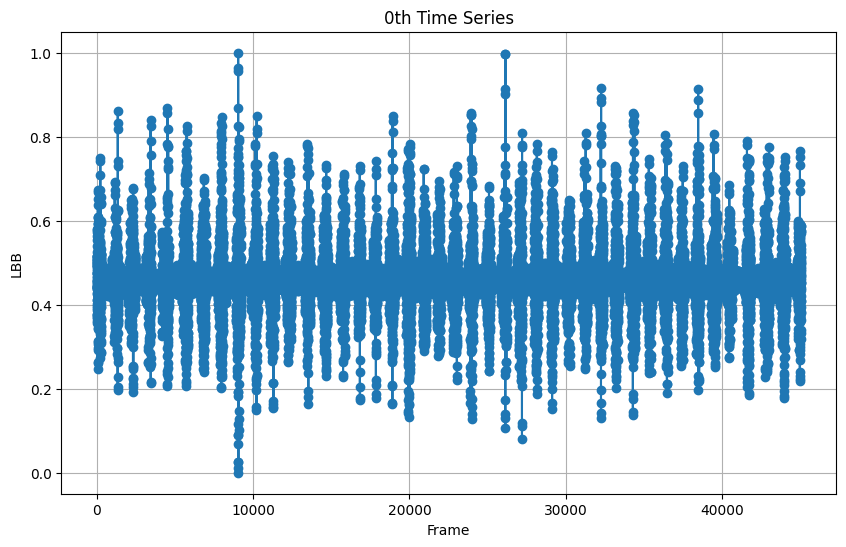

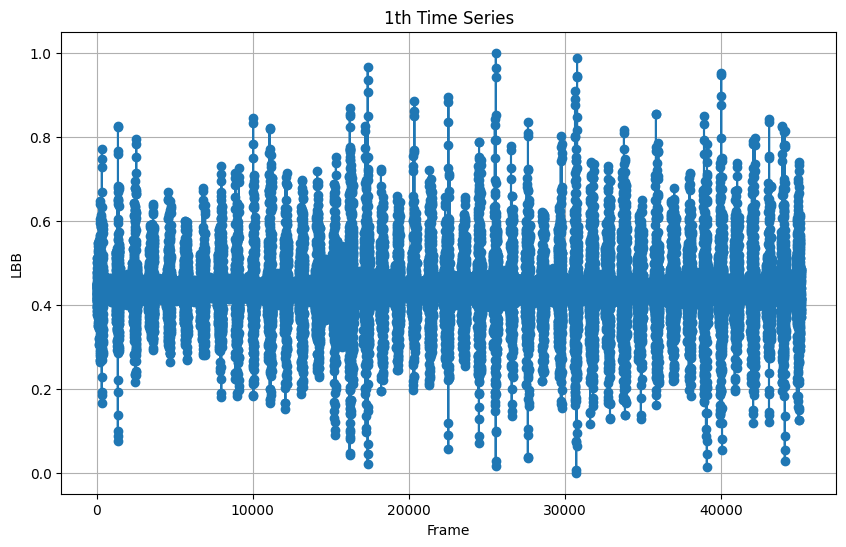

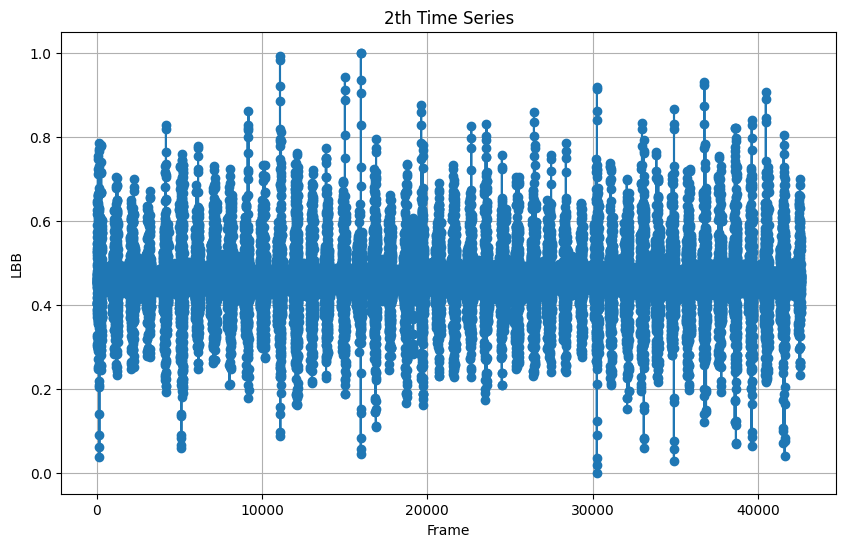

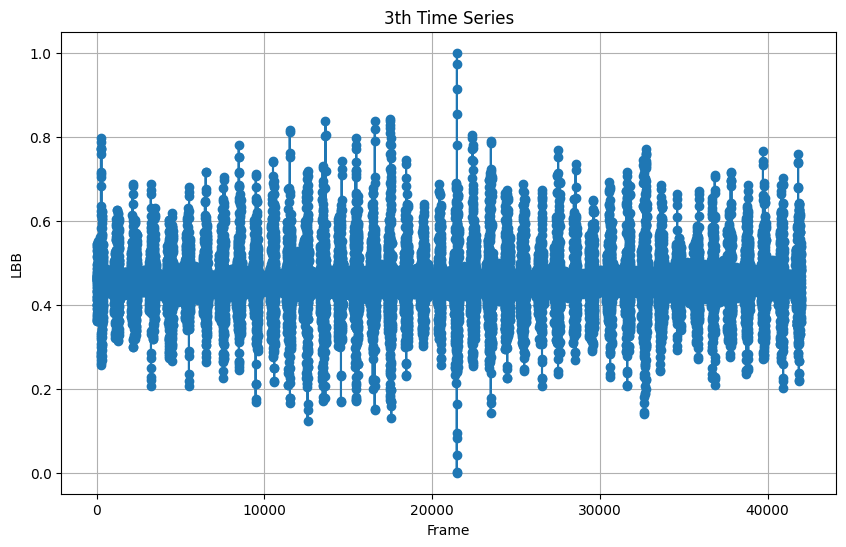

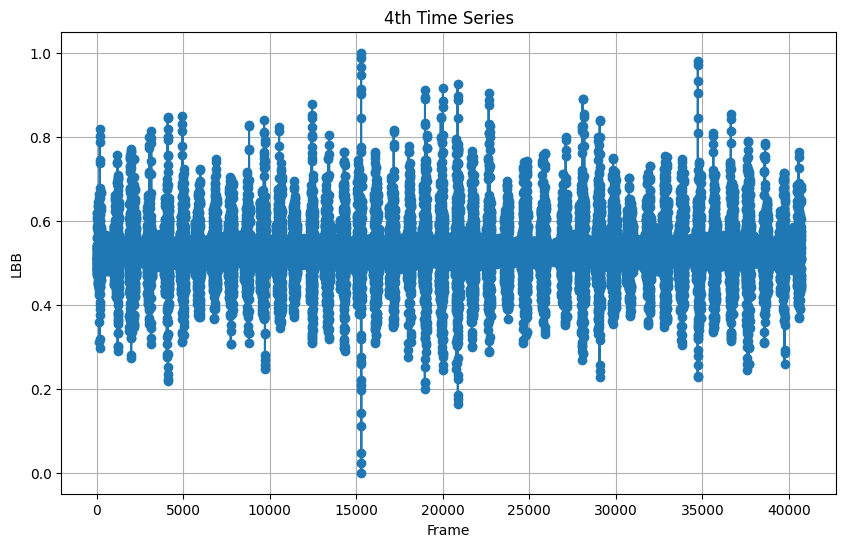

LBB

拆分段 1 模糊熵值:
0.0532413503240008
拆分段 2 模糊熵值:
0.06388491918868512
拆分段 3 模糊熵值:
0.0633799213128884
拆分段 4 模糊熵值:
0.05543262378281811
拆分段 5 模糊熵值:
0.056344399594486345

糊熵值: [0.0532413503240008, 0.06388491918868512, 0.0633799213128884, 0.05543262378281811, 0.056344399594486345]

平均模糊熵值:
 0.05845664284057576

拆分段 1 均方根:
50.07923527790847
拆分段 2 均方根:
60.6784508039887
拆分段 3 均方根:
57.417161826359745
拆分段 4 均方根:
55.430832252501595
拆分段 5 均方根:
56.44563753265457

均方根: [50.07923527790847, 60.6784508039887, 57.417161826359745, 55.430832252501595, 56.44563753265457]


In [1]:
%reset 

import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import EntropyHub as EH
import numpy as np
import math


# 文件路径
file_path = "data/对照组/H06蒙树侠等6个文件/H01陈秋连/upper/chenqiulian_upper_LBB_preprocess.txt"  # 请替换为你的文件路径

# 打开文件
with open("../" + file_path, "r") as file:
    # 跳过前10行
    for _ in range(10):
        next(file)
    
    # 读取剩余的内容
    remaining_content = file.read()

    # 使用 StringIO 将字符串内容转为文件对象
    file_like_object = StringIO(remaining_content)

    # 读取数据到 Pandas DataFrame
    df = pd.read_csv(file_like_object, delimiter=r"\s+")

# 打印剩余的内容
df.set_index('Frame', inplace=True)


column = df.columns[1]


# 找到NaN值所在的行索引
nan_indices = df.index[df[column].isna()].tolist()

# 检查是否有足够的NaN值来拆分成五段
if len(nan_indices) < 6:
    print("NaN值的数量不足以拆分成五段。")
else:
    # 创建一个用于存储拆分后的DataFrame的列表
    split_dfs = []

    # 初始化拆分段的起始索引
    start_index = 0

    # 拆分文件成五段
    for i in range(5):
        # 寻找下一个连续的NaN值段
        while start_index < len(nan_indices) - 1 and nan_indices[start_index + 1] - nan_indices[start_index] == 1:
            start_index += 1

        # 计算当前段的起始和结束索引
        act_start = nan_indices[start_index] + 1
        if start_index < len(nan_indices) - 1:
            act_end = nan_indices[start_index + 1] - 1
        else:
            act_end = len(df) - 1

        print(f"第 {i + 1} 段起始索引：{act_start}，结束索引：{act_end}")

        # 切片并将段添加到拆分后的DataFrame列表中
        split_df = df.iloc[act_start:act_end + 1]
        split_dfs.append(split_df)

        # 移动起始索引到下一个不连续的NaN值段
        start_index += 1

# 打印每个拆分段的数据框（示例）
for i, split_df in enumerate(split_dfs):
    print(f"拆分段 {i + 1}:\n{split_df}")


# 创建一个用于存储拆分后的DataFrame的列表
split_rms = []

# 计算均方根
for i, split_df in enumerate(split_dfs):
    rms = math.sqrt(sum(x ** 2 for x in split_df[column]) / len(split_df))
    split_rms.append(rms)



# 使用 MinMaxScaler 进行最小-最大归一化
scaler_minmax = MinMaxScaler()

# 创建一个用于存储拆分后的DataFrame的列表
split_normal_dfs = []

for i, split_df in enumerate(split_dfs):
    split_normal_dfs.append(scaler_minmax.fit_transform(pd.DataFrame(split_df[column])))




for i, split_df in enumerate(split_normal_dfs):

    # 创建时间序列图
    plt.figure(figsize=(10, 6))  # 可以调整图形大小
    plt.plot(split_df, marker='o', linestyle='-')  # 使用圆点连接线
    plt.xlabel("Frame")
    plt.ylabel(column)
    plt.title(f"{i}th Time Series")
    plt.grid(True)  # 添加网格线
    plt.show()



# 创建一个用于存储拆分后的DataFrame的列表
split_entropyhub = []

r = 0.2

n = 2

print(f"{column}\n")

for i, split_df in enumerate(split_normal_dfs):

    raw = split_df[-35000:]
    #使用模糊熵进行处理
    th = r * np.std(raw)
    Fuzz, Ps1, Ps2 = EH.FuzzEn(raw, m = 3, r=(th, n))
    split_entropyhub.append(Fuzz[-1])



# 使用 NumPy 计算平均值
average = np.mean(split_entropyhub)
# 打印每个拆分段
for i, split_df in enumerate(split_entropyhub):
    print(f"拆分段 {i + 1} 模糊熵值:\n{split_df}")

print("\n糊熵值:", split_entropyhub)
print("\n平均模糊熵值:\n", average)
print()


# 打印均方根
for i, split_rm in enumerate(split_rms):
    print(f"拆分段 {i + 1} 均方根:\n{split_rm}")

print("\n均方根:", split_rms)



In [2]:
# 使用 NumPy 计算平均值
average = np.mean(split_entropyhub)
print(f"{file_path} + {column} 结果:")
print("\n糊熵值:", split_entropyhub)
print("平均模糊熵值:", average)
print("均方根:", split_rms)

data/对照组/H06蒙树侠等6个文件/H01陈秋连/upper/chenqiulian_upper_LBB_preprocess.txt + LBB 结果:

糊熵值: [0.0532413503240008, 0.06388491918868512, 0.0633799213128884, 0.05543262378281811, 0.056344399594486345]
平均模糊熵值: 0.05845664284057576
均方根: [50.07923527790847, 60.6784508039887, 57.417161826359745, 55.430832252501595, 56.44563753265457]
